In [1]:
from bigdl.util.common import *
from image import *
import cv2
import numpy as np
from IPython.display import Image, display
JavaCreator.set_creator_class("com.intel.analytics.zoo.transform.vision.pythonapi.PythonVisionTransform")
init_engine()

In [2]:
test_image = '/home/jxy/data/testdata/test/000019.jpg'

def create_image_feature(path):
    image = cv2.imread(path)
    return ImageFeature(image)
    
def transform_display(transformer, image_feature):
    out = transformer.transform(image_feature)
    cv2.imwrite('/tmp/tmp.jpg', out.get_image(to_chw=False))
    display(Image(filename='/tmp/tmp.jpg'))

creating: createImageFeature
creating: createColorJitter


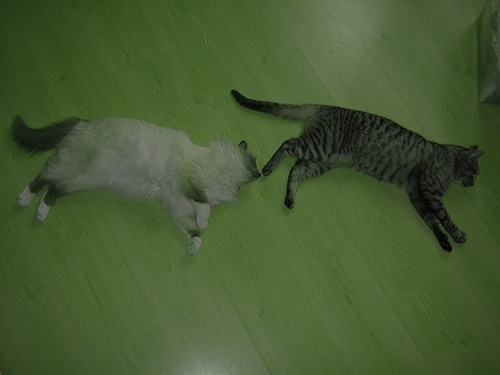

In [3]:
image_feature = create_image_feature(test_image)
color = ColorJitter(random_order_prob=1.0, shuffle=True)
transform_display(color, image_feature)

creating: createImageFeature
creating: createResize


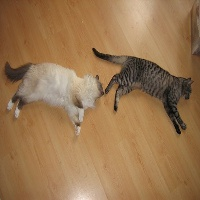

In [4]:
image_feature = create_image_feature(test_image)
resize = Resize(200, 200, 1)
transform_display(resize, image_feature)

creating: createImageFeature
creating: createCrop


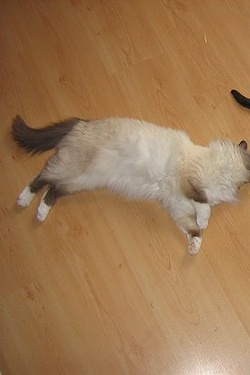

In [5]:
image_feature = create_image_feature(test_image)
crop = Crop(True, [0.0, 0.0, 0.5, 1.0])
transform_display(crop, image_feature)

creating: createImageFeature
creating: createCenterCrop


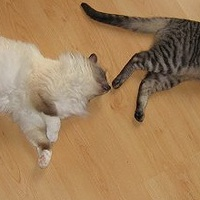

In [6]:
image_feature = create_image_feature(test_image)
crop = CenterCrop(200, 200)
transform_display(crop, image_feature)

creating: createImageFeature
creating: createRandomCrop


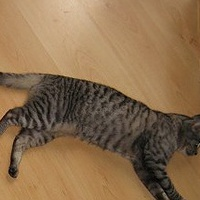

In [7]:
image_feature = create_image_feature(test_image)
crop = RandomCrop(200, 200)
transform_display(crop, image_feature)

creating: createImageFeature
creating: createExpand


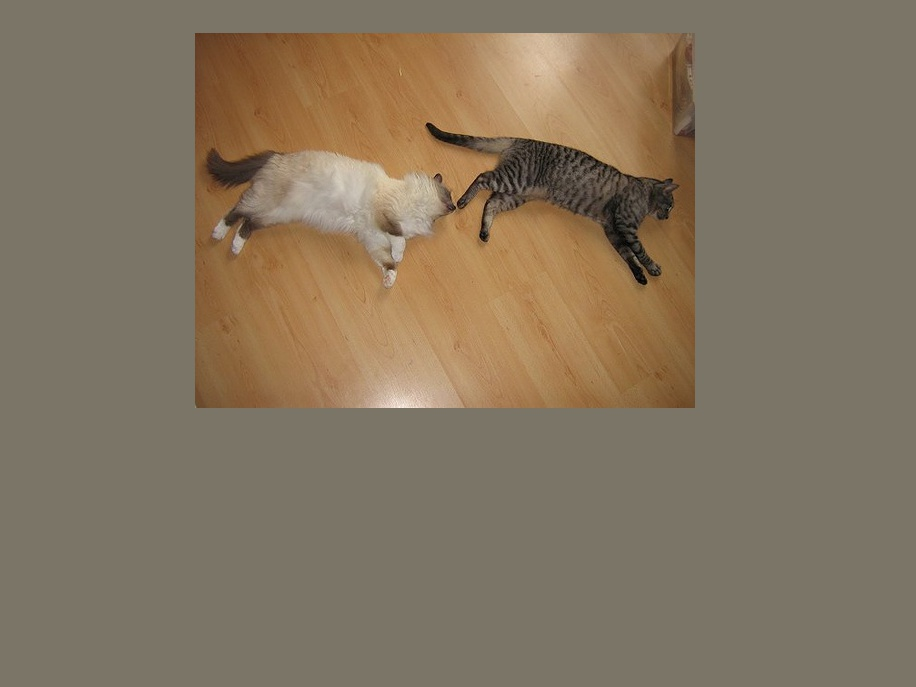

In [8]:
image_feature = create_image_feature(test_image)
expand = Expand(means_r=123, means_g=117, means_b=104,
                 max_expand_ratio=2.0)
transform_display(expand, image_feature)

creating: createImageFeature
creating: createHFlip


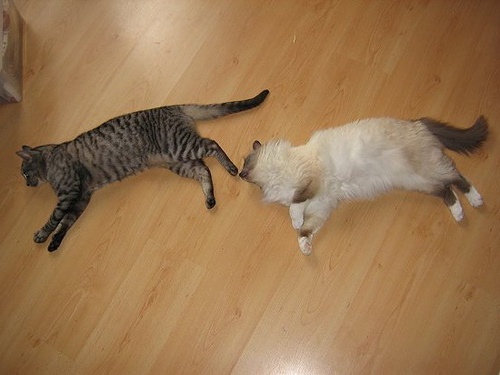

In [9]:
image_feature = create_image_feature(test_image)
transformer = HFlip()
transform_display(transformer, image_feature)

creating: createColorJitter
creating: createHFlip
creating: createResize
creating: createImageFeature


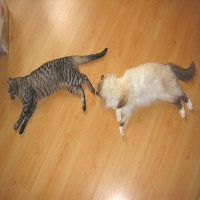

In [10]:
transformer = Pipeline([ColorJitter(), HFlip(), Resize(200, 200, 1)])
image_feature = create_image_feature(test_image)
transform_display(transformer, image_feature)

creating: createHFlip
creating: createRandomTransformer
creating: createImageFeature


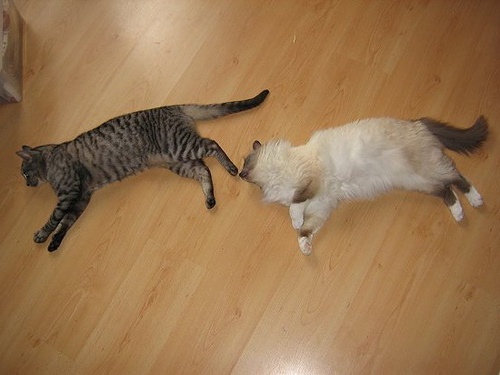

In [11]:
transformer = RandomTransformer(HFlip(), 0.5)
image_feature = create_image_feature(test_image)
transform_display(transformer, image_feature)

In [2]:
folder = "/home/jxy/data/testdata/test"
imageFiles = os.listdir(folder)
images = []
for f in imageFiles:
    image = cv2.imread(folder + '/' + f)
    images.append(image)
    
img_rdd = sc.parallelize(images)
transformer = Pipeline([ColorJitter(), HFlip(), Resize(200, 200, 1), MatToFloats(200, 200)])
feature_rdd = ndarray_to_image_feature(img_rdd)

feature_rdd = transformer(feature_rdd)
out = image_feature_to_sample(feature_rdd) 
print out.count()

color = ColorJitter()
hflip = HFlip()
resize = Resize(200, 200, 1)
to_float = MatToFloats(200, 200)

feature_rdd = ndarray_to_image_feature(img_rdd)
feature_rdd = color(feature_rdd)
feature_rdd = hflip(feature_rdd)
feature_rdd = resize(feature_rdd)
feature_rdd = to_float(feature_rdd)
out = image_feature_to_sample(feature_rdd)
out.count()

creating: createColorJitter
creating: createHFlip
creating: createResize
creating: createMatToFloats
6
creating: createColorJitter
creating: createHFlip
creating: createResize
creating: createMatToFloats


6